In [1]:
%load_ext autoreload
%autoreload 2

In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from src.features.feature_engineering_1 import *
from src.features.q3_plots import *
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, f1_score

In [34]:
# Définition des années de train
years_train = ['2016', '2017', '2018', '2019']

In [35]:
# Chargement des données d'entrainement
data = get_all_season_data(years_train)
data.head()

,period,period_type,period_time,game_seconds,gameID,attacking_team_id,attacking_team_name,home_team,play_type,shooter,...,empty_net,strength,last_event_type,last_event_x,last_event_y,time_since_last_event,distance_from_last_event,powerplay_duration,home_team_players,away_team_players
0,1,REGULAR,01:11,71,2016020001,10,Toronto Maple Leafs,Ottawa Senators,Shot,Mitchell Marner,...,NaN,NaN,Blocked Shot,-61.0,11.0,1,17.088007,0,5,5
1,1,REGULAR,02:53,173,2016020001,9,Ottawa Senators,Ottawa Senators,Shot,Chris Kelly,...,NaN,NaN,Giveaway,54.0,-5.0,5,36.715120,0,5,5
2,1,REGULAR,04:01,241,2016020001,9,Ottawa Senators,Ottawa Senators,Shot,Cody Ceci,...,NaN,NaN,Missed Shot,-72.0,0.0,18,102.318131,0,5,5
3,1,REGULAR,04:46,286,2016020001,9,Ottawa Senators,Ottawa Senators,Shot,Erik Karlsson,...,NaN,NaN,Missed Shot,77.0,-2.0,19,45.880279,0,5,5
4,1,REGULAR,06:46,406,2016020001,10,Toronto Maple Leafs,Ottawa Senators,Shot,Martin Marincin,...,NaN,NaN,Hit,47.0,34.0,16,81.221918,0,5,5


In [36]:
# Ajout des features de distance et d'angle
data = add_new_features(data)
data.head()

,period,period_type,period_time,game_seconds,gameID,attacking_team_id,attacking_team_name,home_team,play_type,shooter,...,last_event_y,time_since_last_event,distance_from_last_event,powerplay_duration,home_team_players,away_team_players,distance_to_net,shot_angle,is_goal,is_empty_net
0,1,REGULAR,01:11,71,2016020001,10,Toronto Maple Leafs,Ottawa Senators,Shot,Mitchell Marner,...,11.0,1,17.088007,0,5,5,13.0,23.0,0,0
1,1,REGULAR,02:53,173,2016020001,9,Ottawa Senators,Ottawa Senators,Shot,Chris Kelly,...,-5.0,5,36.715120,0,5,5,13.0,77.0,0,0
2,1,REGULAR,04:01,241,2016020001,9,Ottawa Senators,Ottawa Senators,Shot,Cody Ceci,...,0.0,18,102.318131,0,5,5,76.0,-30.0,0,0
3,1,REGULAR,04:46,286,2016020001,9,Ottawa Senators,Ottawa Senators,Shot,Erik Karlsson,...,-2.0,19,45.880279,0,5,5,58.0,-15.0,0,0
4,1,REGULAR,06:46,406,2016020001,10,Toronto Maple Leafs,Ottawa Senators,Shot,Martin Marincin,...,34.0,16,81.221918,0,5,5,62.0,27.0,0,0


In [37]:
# Sélection de la caractéristique distance_to_net et des labels is_goal
df1 = data[['distance_to_net', 'is_goal']]
df1.head()

,distance_to_net,is_goal
0,13.0,0
1,13.0,0
2,76.0,0
3,58.0,0
4,62.0,0


In [38]:
# Suppression des valeurs NaN
df1 = df1.dropna()

In [39]:
y1 = df1['is_goal'].values
X1 = df1['distance_to_net'].values

In [40]:
# Split des données d'entrainement en train et val
X_train1, X_val1, y_train1, y_val1 = train_test_split(X1, y1, test_size=0.2)

# Reshape des array
X_train1 = X_train1.reshape(X_train1.shape[0], 1)
X_val1 = X_val1.reshape(X_val1.shape[0], 1)

**Question 1**

In [41]:
modele_base1 = LogisticRegression()
modele_base1.fit(X_train1, y_train1)

LogisticRegression()

In [42]:
# Prédiction des données de val
y_pred1 = modele_base1.predict(X_val1)

In [43]:
accuracy1 = accuracy_score(y_val1, modele_base1.predict(X_val1))
print('Accuracy :', accuracy1)

Accuracy : 0.9053081799434812


In [44]:
confusion_matrix(y_val1, y_pred1)

array([[59266,     0],
       [ 6199,     0]], dtype=int64)

In [13]:
accuracy1 = accuracy_score(y_val1, modele_base1.predict(X_val1))
recall1 = recall_score(y_val1, modele_base1.predict(X_val1))
f1_score1 = f1_score(y_val1, modele_base1.predict(X_val1))
auc1 = roc_auc_score(y_val1, modele_base1.predict_proba(X_val1)[:, 1])

print('Accuracy :', accuracy1)
print('Recall :', recall1)
print('F1-Score :', f1_score1)
print('AUC :', auc1)

Accuracy : 0.9061483235316581
Recall : 0.0
F1-Score : 0.0
AUC : 0.6961000611125979


Nous remarquons que la précision du modèle est très bonne. Cependant ce résultat est trompeur car le modèle prédit que tous les exemples de l'ensemble de validation sont de la classe 0 (à l'aide de la matrice de confusion)

En calculant le Recall on se rend compte qu'il vaut 0. C'est un très très mauvais résultat.

Les problèmes possibles sont :
- Pas assez d'exemple de la classe 1 (pour un but)
- La distance à elle seule ne suffit pas pour prédire correctement 

**Question 2**

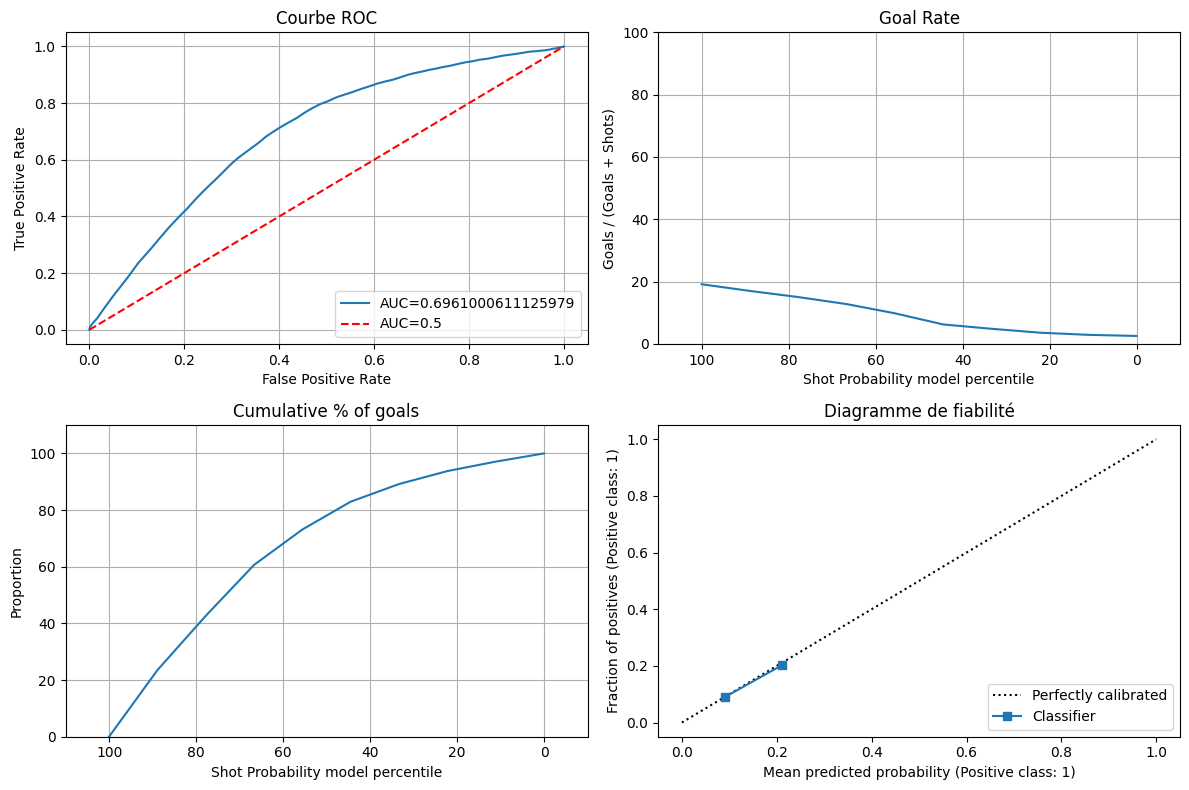

In [14]:
y_pred_proba1 = modele_base1.predict_proba(X_val1)[:, 1]
plot_metrics(y_val1, y_pred_proba1)

**Question 3**

Utilisation de la caractéristique d'angle uniquement

In [15]:
#utilisation de la caractéristique d'angle
df2 = data[['shot_angle', 'is_goal']]
df2 = df2.dropna()
df2.head()

,shot_angle,is_goal
0,23.0,0
1,77.0,0
2,-30.0,0
3,-15.0,0
4,27.0,0


In [16]:
y2 = df2['is_goal'].values
X2 = df2['shot_angle'].values

# Split des données d'entrainement en train et val
X_train2, X_val2, y_train2, y_val2 = train_test_split(X2, y2, test_size=0.2)

# Reshpae des array
X_train2 = X_train2.reshape(X_train2.shape[0], 1)
X_val2 = X_val2.reshape(X_val2.shape[0], 1)

In [17]:
modele_base2 = LogisticRegression()
modele_base2.fit(X_train2, y_train2)

LogisticRegression()

In [18]:
accuracy2 = accuracy_score(y_val2, modele_base2.predict(X_val2))
recall2 = recall_score(y_val2, modele_base2.predict(X_val2))
f1_score2 = f1_score(y_val2, modele_base1.predict(X_val2))
auc2 = roc_auc_score(y_val2, modele_base2.predict_proba(X_val2)[:, 1])

print('Accuracy :', accuracy2)
print('Recall :', recall2)
print('F1-Score :', f1_score2)
print('AUC :', auc2)

Accuracy : 0.9078286107080119
Recall : 0.0
F1-Score : 0.11151906394996974
AUC : 0.5081630261662685


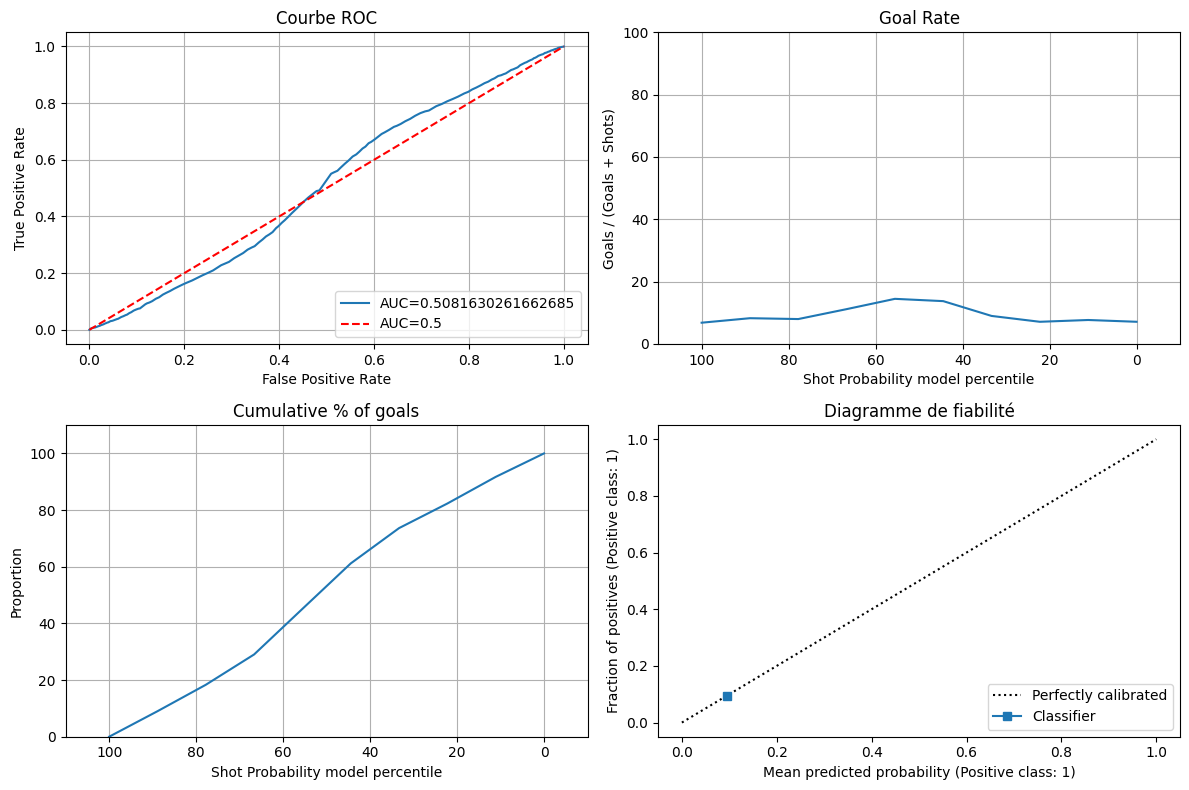

In [19]:
y_pred_proba2 = modele_base2.predict_proba(X_val2)[:, 1]
plot_metrics(y_val2, y_pred_proba2)

**Utilisation de la caractéristique d'angle et distance**

In [20]:
#utilisation de la caractéristique d'angle
df3 = data[['distance_to_net', 'shot_angle', 'is_goal']]
df3 = df3.dropna()
df3.head()

,distance_to_net,shot_angle,is_goal
0,13.0,23.0,0
1,13.0,77.0,0
2,76.0,-30.0,0
3,58.0,-15.0,0
4,62.0,27.0,0


In [21]:
y3 = df3['is_goal'].values
X3 = df3[['distance_to_net', 'shot_angle']].values

# Split des données d'entrainement en train et val
X_train3, X_val3, y_train3, y_val3 = train_test_split(X3, y3, test_size=0.2)

In [22]:
modele_base3 = LogisticRegression()
modele_base3.fit(X_train3, y_train3)

LogisticRegression()

In [23]:
accuracy3 = accuracy_score(y_val3, modele_base3.predict(X_val3))
recall3 = recall_score(y_val3, modele_base3.predict(X_val3))
f1_score3 = f1_score(y_val3, modele_base3.predict(X_val3))
auc3 = roc_auc_score(y_val3, modele_base3.predict_proba(X_val3)[:, 1])

print('Accuracy :', accuracy3)
print('Recall :', recall3)
print('F1-Score :', f1_score3)
print('AUC :', auc3)

Accuracy : 0.9046360650729397
Recall : 0.0
F1-Score : 0.0
AUC : 0.6929990598960553


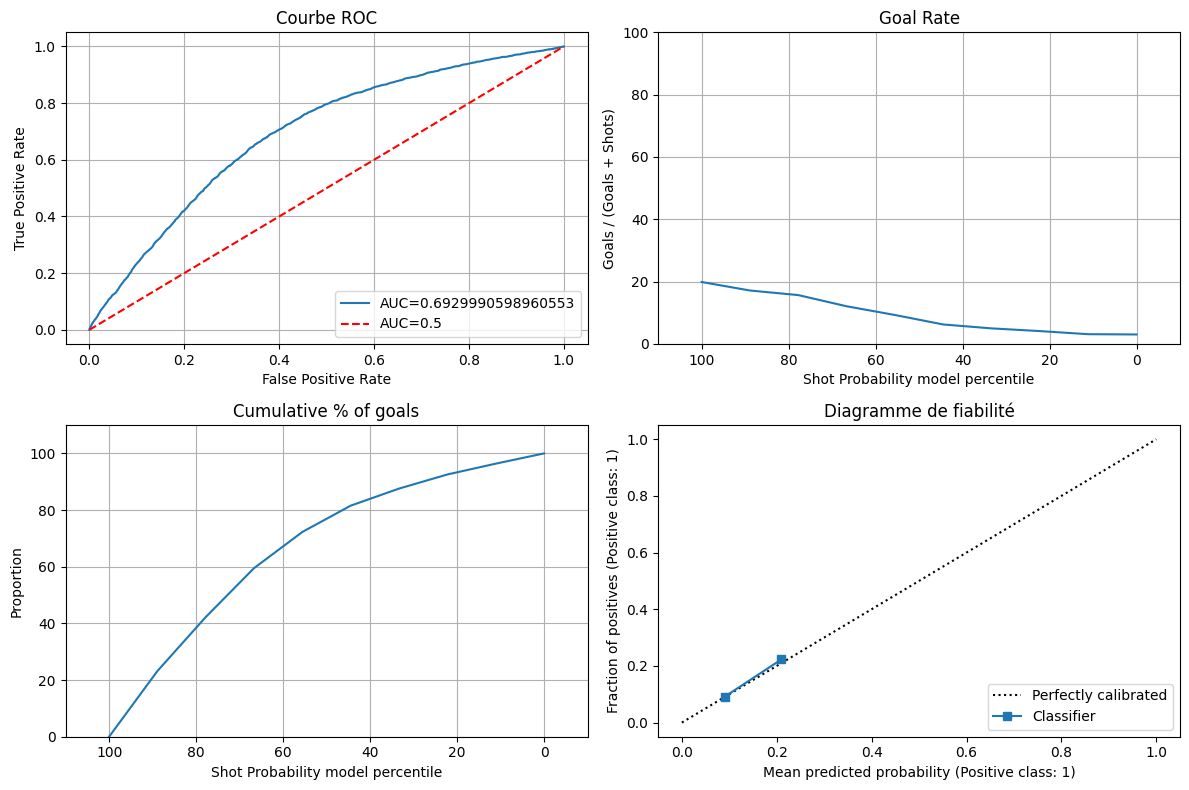

In [24]:
y_pred_proba3 = modele_base3.predict_proba(X_val3)[:, 1]
plot_metrics(y_val3, y_pred_proba3)

$\textbf{Ligne de base aléatoire}$

In [25]:
random_proba = np.random.uniform(0, 1, len(y_val3))

In [26]:
y_pred_proba4 = (random_proba > 0.5) * 1
print(accuracy_score(y_val3, y_pred_proba4))

0.49687619338577865


In [27]:
accuracy4 = accuracy_score(y_val3, y_pred_proba4)
recall4 = recall_score(y_val3, y_pred_proba4)
f1_score4 = f1_score(y_val3, y_pred_proba4)
auc4 = roc_auc_score(y_val3, random_proba)

print('Accuracy :', accuracy4)
print('Recall :', recall4)
print('F1-Score :', f1_score4)
print('AUC :', auc4)

Accuracy : 0.49687619338577865
Recall : 0.5048854717283358
F1-Score : 0.16064830152136797
AUC : 0.4972833739131788


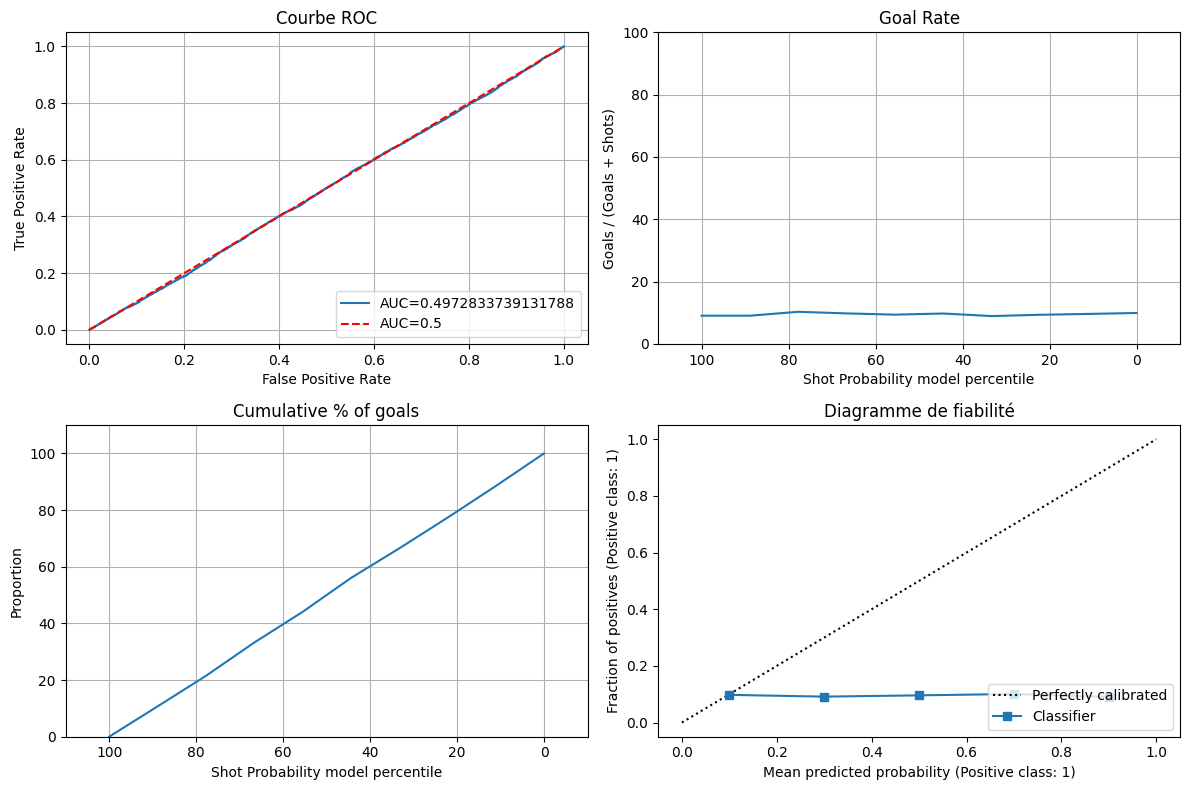

In [28]:
plot_metrics(y_val3, random_proba)

$\text{Superposition de toutes les courbes}$

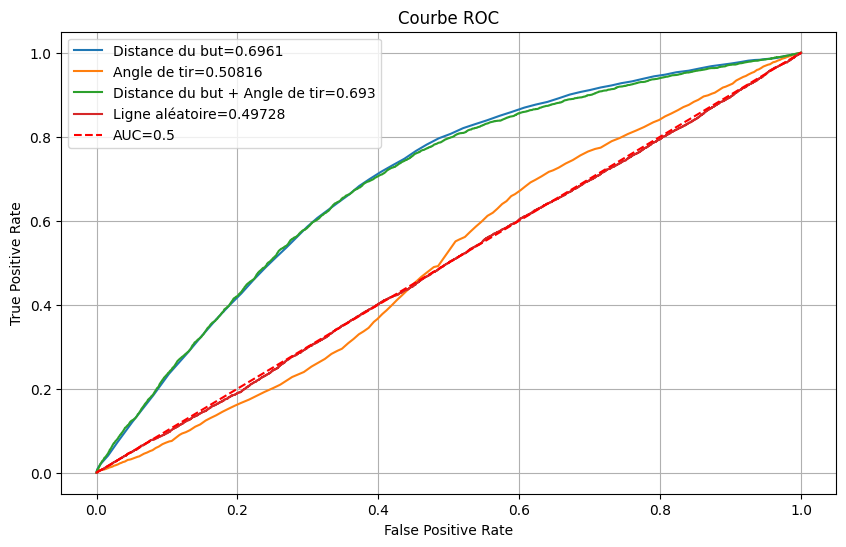

In [29]:
list_y_val = [y_val1, y_val2, y_val3, y_val3]
list_y_proba = [y_pred_proba1, y_pred_proba2, y_pred_proba3, random_proba]
models = ['Distance du but', 'Angle de tir', 'Distance du but + Angle de tir', 'Ligne aléatoire']

plot_all_roc_curve(list_y_val, list_y_proba, models)

Plus l'AUC est proche de 1, meilleure est la performance du modèle. Dans ce cas en utilisant à la fois les caractéristiques de distance et d'angle, le modèle entrainé est le plus performant que si on l'avait entrainé en utilisant soit la distance soit l'angle.

Toutefois nous remarquons qu'en utilisant seulement la caractéristique de distance, les performances du modèle sont meilleures comparé au modèle entrainé en utilisant seulement la caractéristique d'angle. On pourrait conclure que la distance du but est une caractéristique plus importante que celle de l'angle de tir.

Quand on tire uniformément les probabilité de but, l'AUC est proche de 0.5 ce qui équivaut à prédire au hasard s'il y a but ou pas.

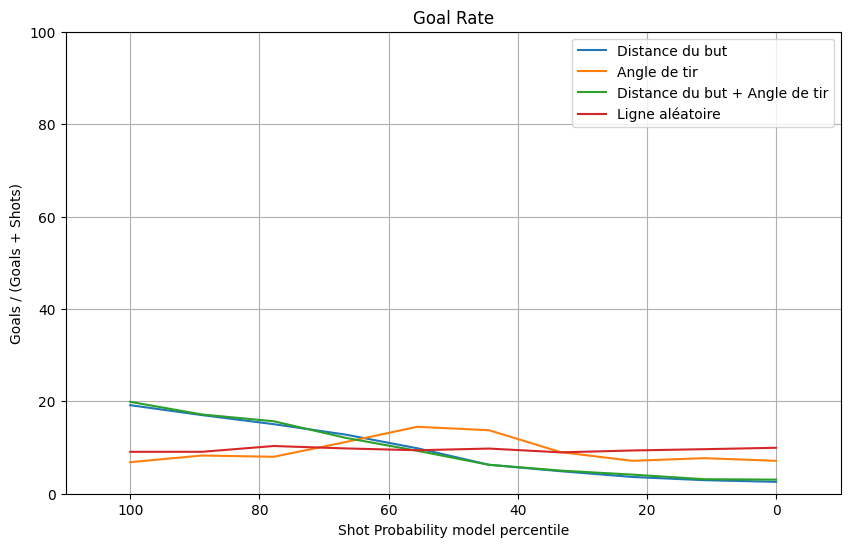

In [30]:
plot_all_goal_rate(list_y_val, list_y_proba, models)

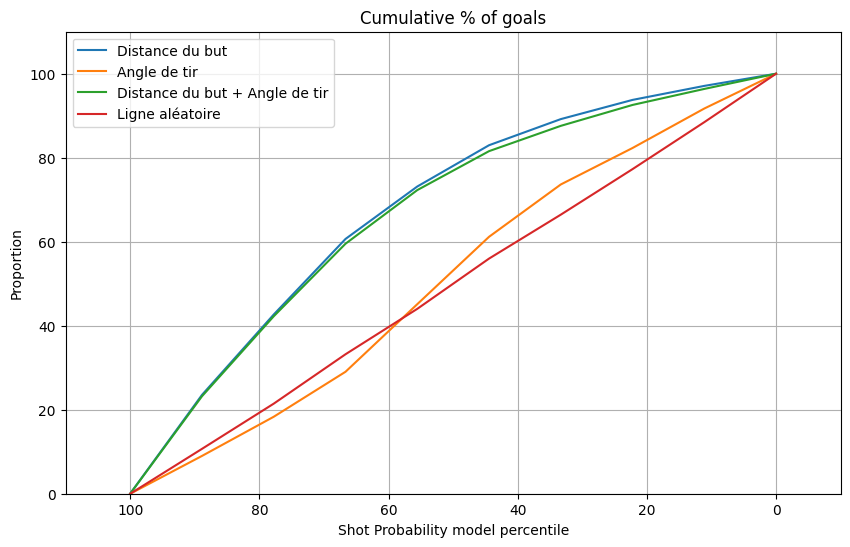

In [31]:
plot_all_cumulative_percent_goal(list_y_val, list_y_proba, models)

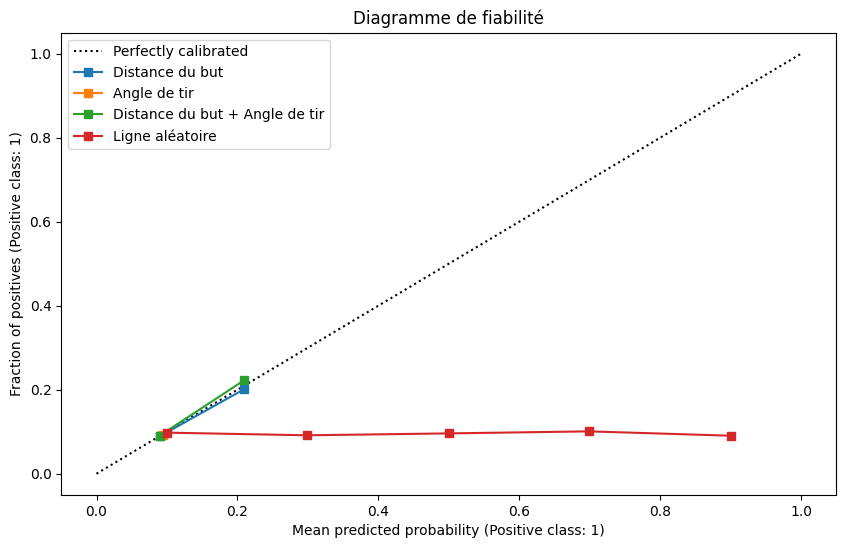

In [32]:
plot_all_fiability_diagram(list_y_val, list_y_proba, models)